### **Time Series Forecasting Models**

#### **Univariate Models**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

In [2]:
stock_data = yf.download('AAPL', start='2023-01-01')
# making the data stationary before model fitting
apple_price_stationary = stock_data['Close'].diff().dropna()
# splitting the data into training and testing
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

[*********************100%***********************]  1 of 1 completed


In [3]:
from statsmodels.tsa.stattools import adfuller

# Performed the Augmented Dickey Fuller Test
adf_test = adfuller(apple_price_stationary)

print('ADF Test Results: ')
print(f'ADF Statistics: {round(adf_test[0], 3)}')
print(f'p-value: {round(adf_test[1], 3)}')
print("-------------------")
print(f'Critical Values: ')
for key, value in adf_test[4].items():
  print(f'{key}: {round(value, 3)}')

ADF Test Results: 
ADF Statistics: -21.646
p-value: 0.0
-------------------
Critical Values: 
1%: -3.443
5%: -2.867
10%: -2.57


**AR Model**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


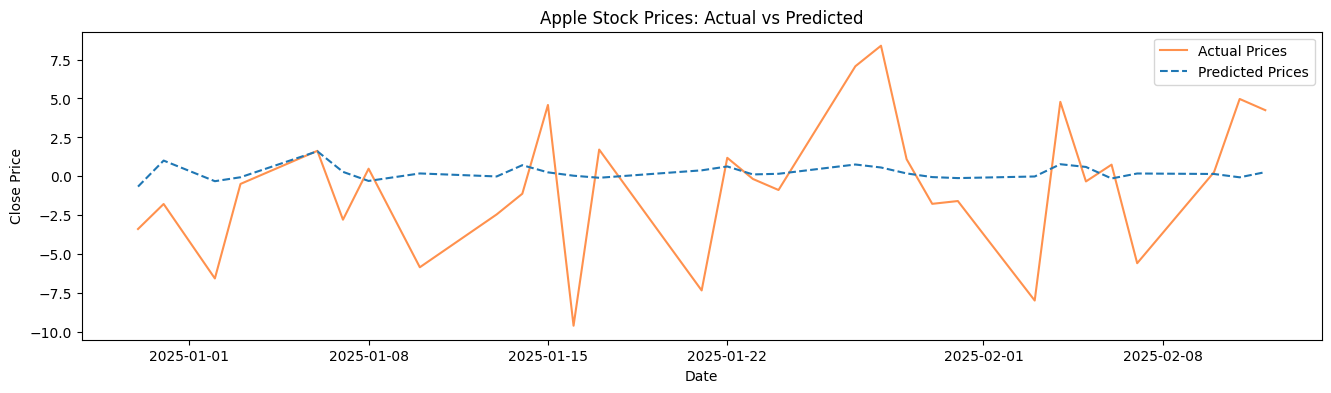

RMSE: 4.28


In [4]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# fit the AutoRegressive model to training data
model = AutoReg(train_data, lags=30)
model_fit = model.fit()

# make prediction using test data
prediction = model_fit.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1,
    dynamic=False
)

# plot the actual and predicted values
plt.figure(figsize=(16,4))
plt.plot(test_data.index, test_data, label='Actual Prices', color='#FF914D')
plt.plot(test_data.index, prediction, label='Predicted Prices', linestyle='--')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using rmse score
score = round(np.sqrt(mean_squared_error(test_data, prediction)), 2)
print(f'RMSE: {score}')

**MA Model**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


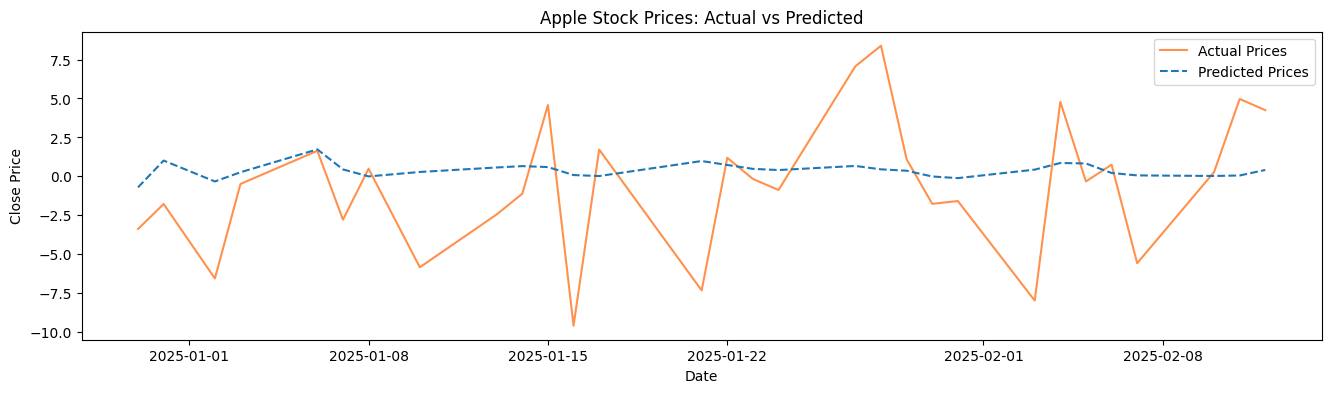

RMSE: 4.35


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# fit the moving average (MA) to training data
model = ARIMA(train_data, order=(0,0,30))
model_fit = model.fit()

# make prediction on test data
prediction = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) -1
)

# plot the actual and predicted values
plt.figure(figsize=(16,4))
plt.plot(test_data.index, test_data, label='Actual Prices', color='#FF914D')
plt.plot(test_data.index, prediction, label='Predicted Prices', linestyle='--')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using rmse score
score = round(np.sqrt(mean_squared_error(test_data, prediction)), 2)
print(f'RMSE: {score}')

**ARMA Model**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/di

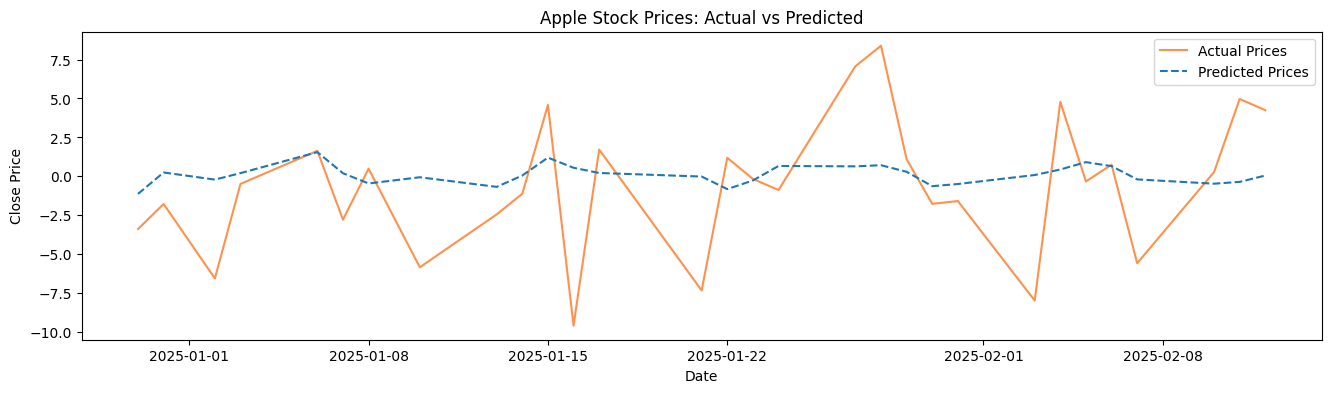

RMSE: 4.24


In [6]:
# fit the auto regressive + moving average (ARMA) to training data
model = ARIMA(train_data, order=(7,0,7))
model_fit = model.fit()

# make prediction on test data
prediction = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) -1
)

# plot the actual and predicted values
plt.figure(figsize=(16,4))
plt.plot(test_data.index, test_data, label='Actual Prices', color='#FF914D')
plt.plot(test_data.index, prediction, label='Predicted Prices', linestyle='--')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using rmse score
score = round(np.sqrt(mean_squared_error(test_data, prediction)), 2)
print(f'RMSE: {score}')

**ARIMA Model**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/di

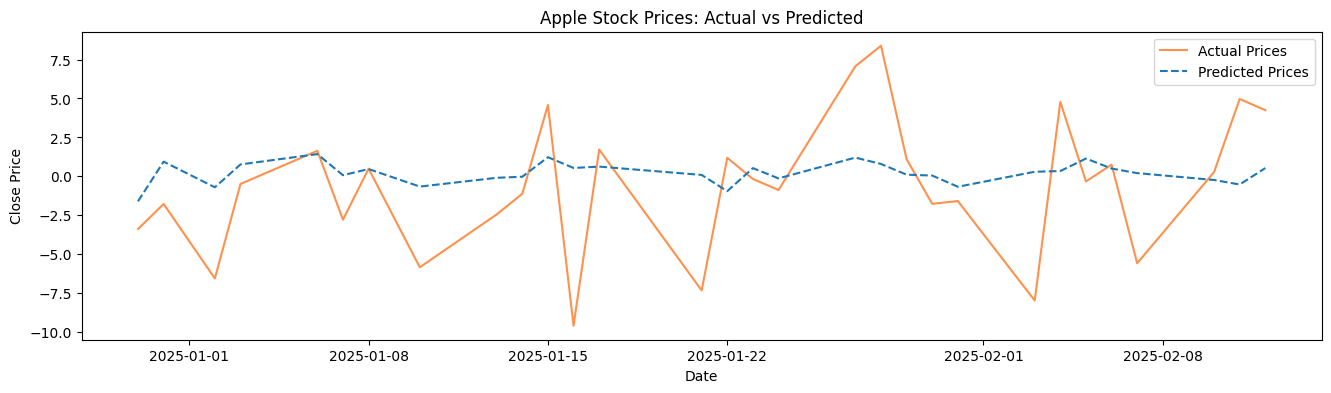

RMSE: 4.2


In [7]:
# fit the auto regressive + differ + moving average (ARIMA) to training data
model = ARIMA(train_data, order=(7,1,7))
model_fit = model.fit()

# make prediction on test data
prediction = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) -1
)

# plot the actual and predicted values
plt.figure(figsize=(16,4))
plt.plot(test_data.index, test_data, label='Actual Prices', color='#FF914D')
plt.plot(test_data.index, prediction, label='Predicted Prices', linestyle='--')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using rmse score
score = round(np.sqrt(mean_squared_error(test_data, prediction)), 2)
print(f'RMSE: {score}')

**SARIMA Model**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


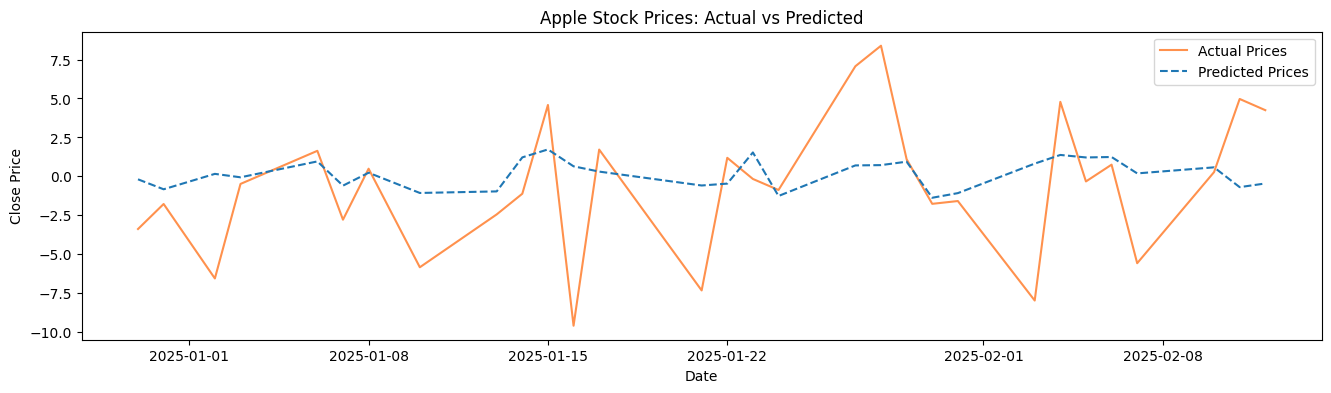

RMSE: 4.23


In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p,d,q = 7,1,7
P,D,Q,s = 1,1,1,45

# fit the sarima model
model = SARIMAX(train_data, order=(p,d,q), seasonal_order=(P,D,Q,s))
model_fit = model.fit()

# make prediction on test data
prediction = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) -1
)

# plot the actual and predicted values
plt.figure(figsize=(16,4))
plt.plot(test_data.index, test_data, label='Actual Prices', color='#FF914D')
plt.plot(test_data.index, prediction, label='Predicted Prices', linestyle='--')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using rmse score
score = round(np.sqrt(mean_squared_error(test_data, prediction)), 2)
print(f'RMSE: {score}')

#### **Multivariate Models**

**Checking Feature Dependency**

In [9]:
tsla_data = yf.download('TSLA', start='2023-01-01')

stock_data['TSLA_Close'] = tsla_data['Close']
stock_data['APPL_Close'] = stock_data['Close'].shift()
stock_data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [10]:
from statsmodels.tsa.stattools import grangercausalitytests

# Perform Granger Causality Test
grangercausalitytests(stock_data[['APPL_Close', 'TSLA_Close']].dropna(), maxlag=14)
print()


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3413  , p=0.5593  , df_denom=525, df_num=1
ssr based chi2 test:   chi2=0.3432  , p=0.5580  , df=1
likelihood ratio test: chi2=0.3431  , p=0.5580  , df=1
parameter F test:         F=0.3413  , p=0.5593  , df_denom=525, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=35.6815 , p=0.0000  , df_denom=522, df_num=2
ssr based chi2 test:   chi2=72.0465 , p=0.0000  , df=2
likelihood ratio test: chi2=67.5290 , p=0.0000  , df=2
parameter F test:         F=35.6815 , p=0.0000  , df_denom=522, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=23.9018 , p=0.0000  , df_denom=519, df_num=3
ssr based chi2 test:   chi2=72.6725 , p=0.0000  , df=3
likelihood ratio test: chi2=68.0715 , p=0.0000  , df=3
parameter F test:         F=23.9018 , p=0.0000  , df_denom=519, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=17.8511 , p=0.0000  

**Final Interpretation**
* At lag 1, there is no evidence of Granger causality.
* At lag 2 and beyond, we find strong evidence of Granger causality (p < 0.05 for all higher lags).
* This means past values of the first time series significantly improve predictions of the second time series.

**VAR Model**

In [11]:
data = stock_data[['APPL_Close', 'TSLA_Close']].diff().dropna()
train_data, test_data = data[:-14], data[-14:]

In [12]:
data

Price,APPL_Close,TSLA_Close
Ticker,,
Date,,
2023-01-05,1.275177,-3.300003
2023-01-06,-1.324623,2.720001
2023-01-09,4.547119,6.709999
2023-01-10,0.523926,-0.919998
2023-01-11,0.573318,4.370003
...,...,...
2025-02-06,-0.329636,-3.850006
2025-02-07,0.749176,-12.700012


In [13]:
train_data.shape

(514, 2)

In [14]:
test_data.shape

(14, 2)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


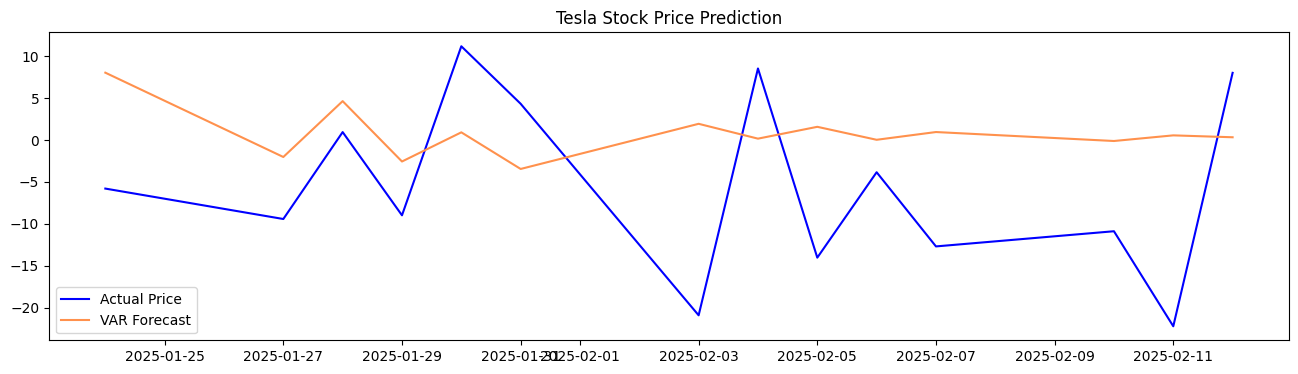

RMSE: 12.53


In [15]:
from statsmodels.tsa.api import VAR, VARMAX

# fit the var model on train data
model = VAR(train_data)
result = model.fit(maxlags=7)
predictions = result.forecast(train_data.values[-result.k_ar:], steps=len(test_data))

predictions = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)

# plotting
plt.figure(figsize=(16,4))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VAR Forecast', color='#FF914D')
plt.title('Tesla Stock Price Prediction')
plt.legend()
plt.show()

# evaluating model using rmse score
score = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print(f'RMSE: {score}')


**VMA Model**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


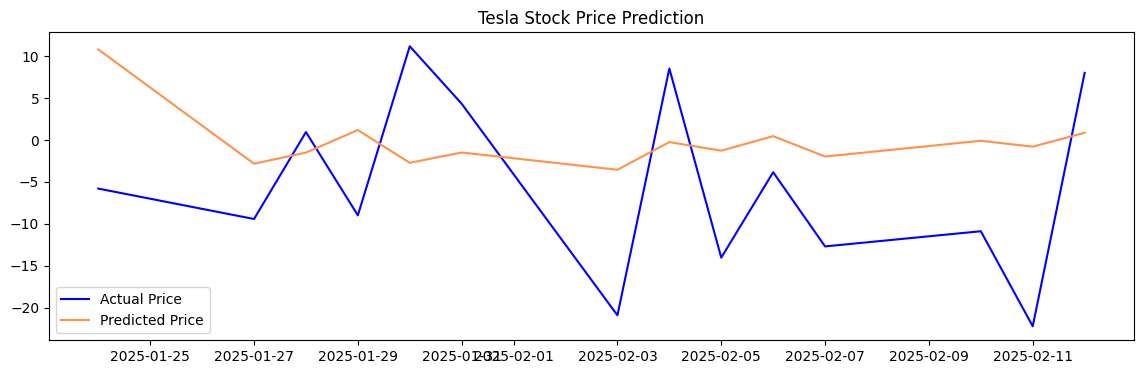

RMSE: 11.83


In [16]:
# fit the VMA model on training data
model = VARMAX(train_data, order=(0,14))
result = model.fit()

# prediction
predictions = result.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1
)

# plotting
plt.figure(figsize=(14,4))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='Predicted Price', color='#ff914d')
plt.title('Tesla Stock Price Prediction')
plt.legend()
plt.show()

# evaluating model using rmse score
score = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print(f'RMSE: {score}')

**VARIMA Model**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


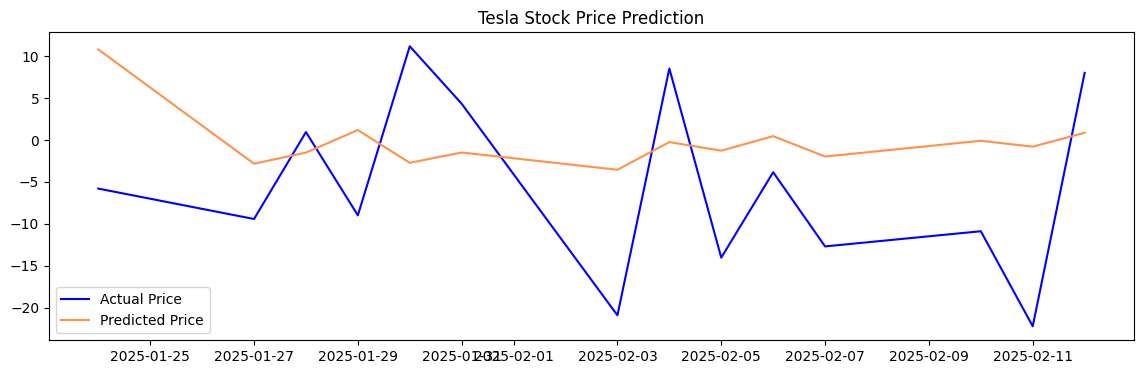

RMSE: 11.83


In [17]:
# fit varima model on training data
model = VARMAX(train_data, order=(14,14))
model_fit = model.fit()

# prediction
predictions = result.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1
)

# plotting
plt.figure(figsize=(14,4))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='Predicted Price', color='#ff914d')
plt.title('Tesla Stock Price Prediction')
plt.legend()
plt.show()

# evaluating model using rmse score
score = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print(f'RMSE: {score}')